<a href="https://colab.research.google.com/github/animakumawat/customer_churn-sklearn/blob/main/Customer_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Exploratory Data Analysis

#### 1.1 Import libraries

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Dataset
df = pd.read_csv("/content/drive/MyDrive/Customer churn/Customer-Churn-Records.csv")
df.shape

(10000, 18)

#### 1.2 Missing values
  look for missing values and try to handle them.

In [42]:
df.isna().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

#### 1.3 Data Exploration

In [43]:
df.Exited.value_counts()

0    7962
1    2038
Name: Exited, dtype: int64

Target variable has imbalanced class distribution. Positive class (Exited=1) is much less than negative class (Exited=0). Imbalanced class distributions influence the performance of a machine learning model negatively. We will use upsampling or downsampling to overcome this issue.

In [44]:
#features having only two values.
columns = df.columns
binary_cols = []
for col in columns:
    if df[col].value_counts().shape[0] == 2:
        binary_cols.append(col)
binary_cols

['Gender', 'HasCrCard', 'IsActiveMember', 'Exited', 'Complain']

<Axes: xlabel='Complain', ylabel='count'>

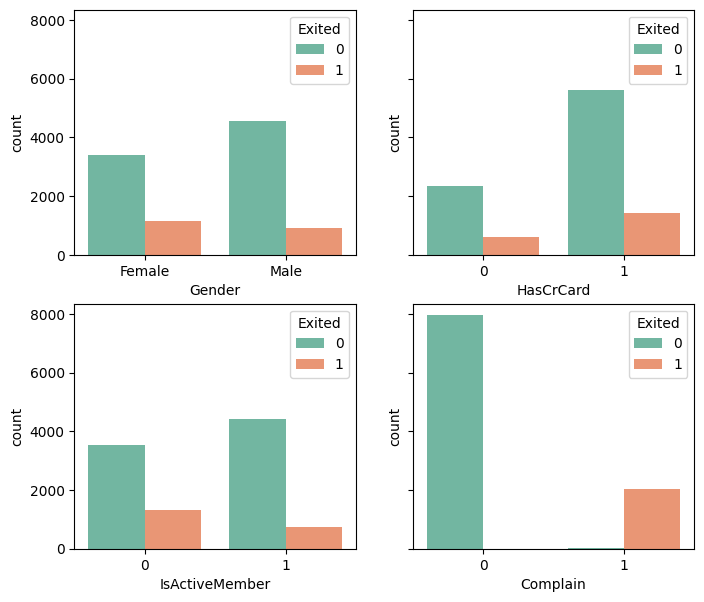

In [45]:
#class distribution of binary features.
fig, axes = plt.subplots(2, 2, figsize=(8, 7), sharey=True)
sns.countplot(data=df, x="Gender", hue='Exited', palette="Set2", ax=axes[0,0])
sns.countplot(data=df, x="HasCrCard",hue='Exited',palette="Set2", ax=axes[0,1])
sns.countplot(data=df, x="IsActiveMember",hue='Exited',palette="Set2", ax=axes[1,0])
sns.countplot(data=df, x="Complain",hue='Exited',palette="Set2", ax=axes[1,1])

In [46]:
#checking binary categorical features in terms of churn rate.

df[['Gender','Exited']].groupby(['Gender']).mean()

,Exited
Gender,
Female,0.250715
Male,0.164743


In [47]:
df[['HasCrCard','Exited']].groupby(['HasCrCard']).mean()

,Exited
HasCrCard,
0,0.208149
1,0.201984


In [48]:
df[['IsActiveMember','Exited']].groupby(['IsActiveMember']).mean()

,Exited
IsActiveMember,
0,0.268715
1,0.142691


In [49]:
df[['Complain','Exited']].groupby(['Complain']).mean()

,Exited
Complain,
0,0.000503
1,0.995108


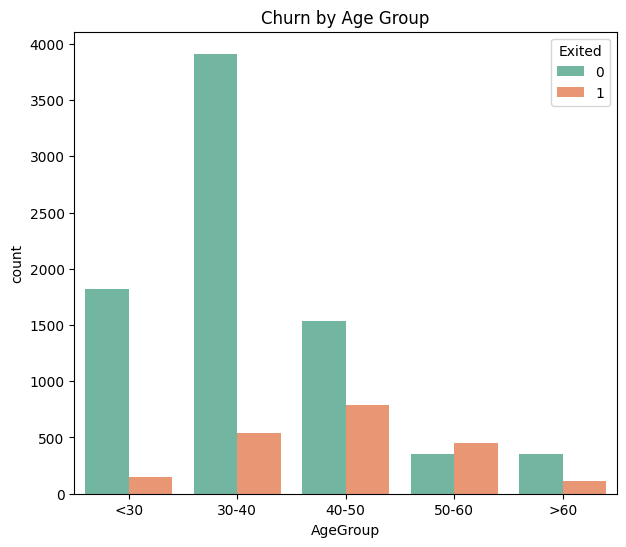

,Exited
AgeGroup,
<30,0.075203
30-40,0.121096
40-50,0.339655
50-60,0.562108
>60,0.247845


In [50]:
#Churn rate by age group
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 30, 40, 50, 60, np.inf], labels=['<30', '30-40', '40-50', '50-60', '>60'])
plt.figure(figsize=(7, 6))
sns.countplot(x='AgeGroup', data=df, palette='Set2', hue='Exited')
plt.title('Churn by Age Group')
plt.show()

df[['AgeGroup','Exited']].groupby(['AgeGroup']).mean()

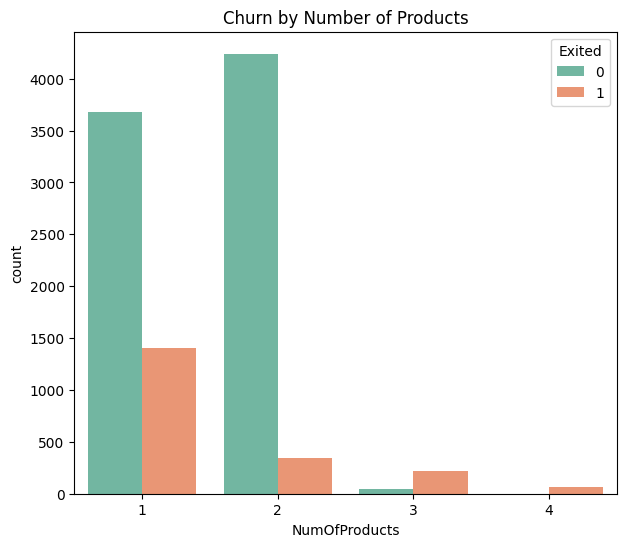

,Exited
NumOfProducts,
1,0.277144
2,0.076035
3,0.827068
4,1.000000


In [51]:
#churn rate by number of products.
plt.figure(figsize=(7, 6))
sns.countplot(x='NumOfProducts', palette='Set2', data=df, hue='Exited')
plt.title('Churn by Number of Products')
plt.show()
df[['NumOfProducts','Exited']].groupby(['NumOfProducts']).mean()

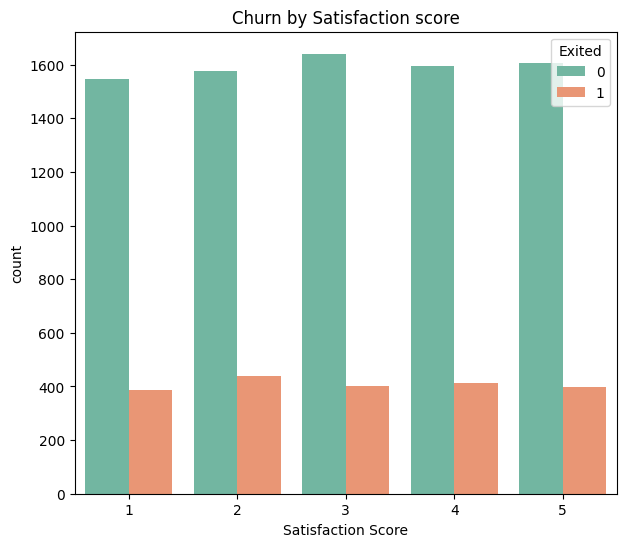

,Exited
Satisfaction Score,
1,0.200311
2,0.217974
3,0.196376
4,0.206175
5,0.198104


In [52]:
#churn rate by satisfaction score.
plt.figure(figsize=(7, 6))
sns.countplot(x='Satisfaction Score', palette='Set2', data=df, hue='Exited')
plt.title('Churn by Satisfaction score')
plt.show()
df[['Satisfaction Score','Exited']].groupby(['Satisfaction Score']).mean()

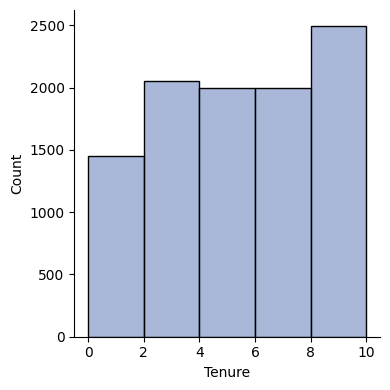

In [53]:
#distribution of continuous features.
sns.displot(df["Tenure"], bins=5, height=4, aspect=1, color='#8da0cb')

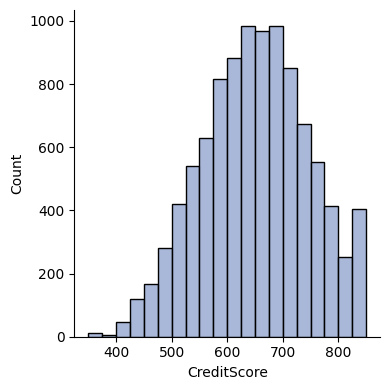

In [54]:
sns.displot(df["CreditScore"], bins=20, height=4, aspect=1, color='#8da0cb')

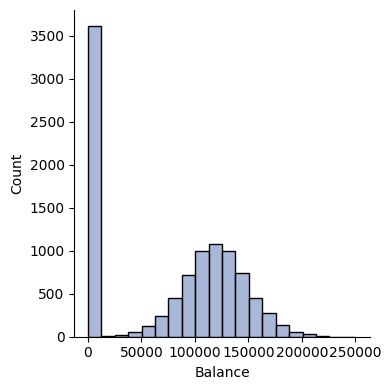

In [55]:
sns.displot(df['Balance'], bins=20, height=4, aspect=1, color='#8da0cb')

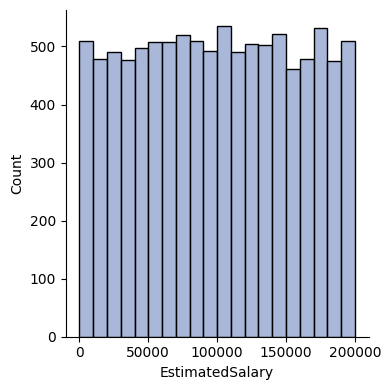

In [56]:
sns.displot(df['EstimatedSalary'], bins=20, height=4, aspect=1, color='#8da0cb')

In [57]:
#change in churn rate with tenure, credit score, balance and salary.
df[['Tenure', 'CreditScore', 'Balance', 'EstimatedSalary', 'Exited']].groupby('Exited').mean()

,Tenure,CreditScore,Balance,EstimatedSalary
Exited,,,,
0,5.032781,651.837855,72742.750663,99726.853141
1,4.934740,645.414622,91109.476006,101509.908783


#### 1.4 Dropping columns

In [58]:
df.drop([ 'RowNumber', 'CustomerId', 'Surname', 'HasCrCard', 'Tenure', 'Card Type', 'Point Earned', 'Satisfaction Score', 'AgeGroup','EstimatedSalary' ], axis=1, inplace=True)

## 2. Data Preprocessing
Categorical features need to be converted to numbers so that they can be included in calculations done by a machine learning model.

#### 2.1 Encoding variables:



In [59]:
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [60]:
ct = ColumnTransformer(
      [("Age_bins", KBinsDiscretizer(n_bins=6, strategy='kmeans'), ['Age']),
       ("continuous_var", MinMaxScaler(), ['CreditScore','Balance']),
       ( "categorical_var", OneHotEncoder(), ['Geography', 'Gender'] )])

#### 2.2 Resampling

Text(0.5, 1.0, 'Class Distribution Before Resampling')

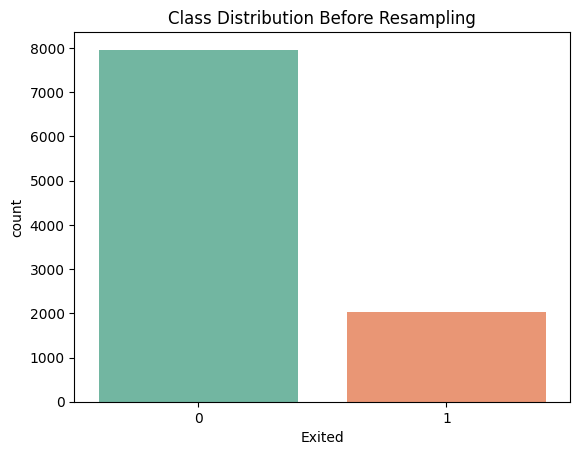

In [61]:
sns.countplot(data=df, x="Exited", palette="Set2").set_title('Class Distribution Before Resampling')

In [62]:
from sklearn.utils import resample

# Separate majority and minority classes
majority_class = df[df['Exited'] == 0]
minority_class = df[df['Exited'] == 1]

# Determine the size of the minority class
minority_class_size = minority_class.shape[0]

# Oversample the minority class randomly
oversampled_minority = resample(minority_class, replace=True, n_samples=majority_class.shape[0])

# Concatenate the oversampled minority class with the original majority class
oversampled_df = pd.concat([majority_class, oversampled_minority])

# Shuffle the oversampled dataframe
balanced_df = oversampled_df.sample(frac=1, random_state=42).reset_index(drop=True)


Text(0.5, 1.0, 'Class Distribution After Resampling')

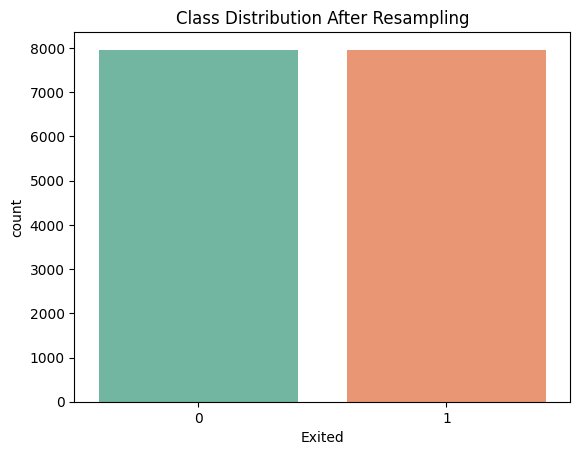

In [63]:
sns.countplot(x='Exited', data=balanced_df, palette="Set2").set_title('Class Distribution After Resampling')

### 3. Model Creation and Evaluation

In [64]:
from sklearn.model_selection import train_test_split

y= balanced_df.Exited
X= balanced_df.drop(['Exited'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.pipeline import Pipeline

logit_clf = Pipeline(steps=[
    ('preprocessor', ct),
    ('model', LogisticRegression(random_state=42))
])

svm_clf = Pipeline(steps=[
    ('preprocessor', ct),
    ('model', svm.SVC(kernel='rbf', C=1.0))
])

In [66]:
logit_clf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('Age_bins',
                                                  KBinsDiscretizer(n_bins=6,
                                                                   strategy='kmeans'),
                                                  ['Age']),
                                                 ('continuous_var',
                                                  MinMaxScaler(),
                                                  ['CreditScore', 'Balance']),
                                                 ('categorical_var',
                                                  OneHotEncoder(),
                                                  ['Geography', 'Gender'])])),
                ('model', LogisticRegression(random_state=42))])

In [67]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV

y_log_pred = logit_clf.predict(X_test)

print('Accuracy Score:', accuracy_score(y_test, y_log_pred))
print('Precision:', precision_score(y_test, y_log_pred, average='binary'))
print('Recall:', recall_score(y_test, y_log_pred, average='binary'))
print('F1 Score:', f1_score(y_test, y_log_pred, average='binary') )

Accuracy Score: 0.7243328100470957
Precision: 0.7405106970324362
Recall: 0.6812698412698412
F1 Score: 0.7096560846560847


In [68]:
svm_clf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('Age_bins',
                                                  KBinsDiscretizer(n_bins=6,
                                                                   strategy='kmeans'),
                                                  ['Age']),
                                                 ('continuous_var',
                                                  MinMaxScaler(),
                                                  ['CreditScore', 'Balance']),
                                                 ('categorical_var',
                                                  OneHotEncoder(),
                                                  ['Geography', 'Gender'])])),
                ('model', SVC())])

In [69]:
y_svm_pred = svm_clf.predict(X_test)

print('Accuracy Score:', accuracy_score(y_test, y_svm_pred))
print('Precision:', precision_score(y_test, y_svm_pred, average='binary'))
print('Recall:', recall_score(y_test, y_svm_pred, average='binary'))
print('F1 Score:', f1_score(y_test, y_svm_pred, average='binary') )

Accuracy Score: 0.7215070643642072
Precision: 0.7182741116751269
Recall: 0.7187301587301588
F1 Score: 0.7185020628371945


#### 3.1 Hyperparameter Tuning

In [70]:
from sklearn.model_selection import GridSearchCV

# Parameter grid for Logistic Regression
logit_param_grid = {
    'model__C': [0.1,1,10],
    'model__solver': ['liblinear', 'lbfgs']
}

# Perform grid search for Logistic Regression
logit_grid_search = GridSearchCV(logit_clf, logit_param_grid, cv=5)
logit_grid_search.fit(X_train, y_train)

# Parameter grid for SVM
svm_param_grid = {
    'model__C': [0.1,1,10],
    'model__kernel': ['linear', 'rbf']
}

# Perform grid search for SVM
svm_grid_search = GridSearchCV(svm_clf, svm_param_grid, cv=5)
svm_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('Age_bins',
                                                                         KBinsDiscretizer(n_bins=6,
                                                                                          strategy='kmeans'),
                                                                         ['Age']),
                                                                        ('continuous_var',
                                                                         MinMaxScaler(),
                                                                         ['CreditScore',
                                                                          'Balance']),
                                                                        ('categorical_var',
                                                                         OneHotEncoder(),
                                                                         ['Geography',
                                                                          'Gender'])])),
                                       ('model', SVC())]),
             param_grid={'model__C': [0.1, 1, 10],
                         'model__kernel': ['linear', 'rbf']})

In [71]:
# Best parameters for Logistic Regression
logit_best_params = logit_grid_search.best_params_
print("Best parameters for Logistic Regression:", logit_best_params)

# Best parameters for SVM
svm_best_params = svm_grid_search.best_params_
print("Best parameters for SVM:", svm_best_params)


Best parameters for Logistic Regression: {'model__C': 0.1, 'model__solver': 'liblinear'}
Best parameters for SVM: {'model__C': 10, 'model__kernel': 'rbf'}


In [72]:
# Predict using Logistic Regression
logit_predictions = logit_grid_search.predict(X_test)

# Predict using SVM
svm_predictions = svm_grid_search.predict(X_test)

In [73]:
# Calculate accuracy
logit_accuracy = accuracy_score(y_test, logit_predictions)
svm_accuracy = accuracy_score(y_test, svm_predictions)
print("Accuracy - Logistic Regression:", logit_accuracy)
print("Accuracy - SVM:", svm_accuracy)

# Calculate precision
logit_precision = precision_score(y_test, logit_predictions)
svm_precision = precision_score(y_test, svm_predictions)
print("Precision - Logistic Regression:", logit_precision)
print("Precision - SVM:", svm_precision)

# Calculate recall
logit_recall = recall_score(y_test, logit_predictions)
svm_recall = recall_score(y_test, svm_predictions)
print("Recall - Logistic Regression:", logit_recall)
print("Recall - SVM:", svm_recall)

Accuracy - Logistic Regression: 0.7230769230769231
Accuracy - SVM: 0.7246467817896389
Precision - Logistic Regression: 0.7368421052631579
Precision - SVM: 0.7336010709504686
Recall - Logistic Regression: 0.6844444444444444
Recall - SVM: 0.6958730158730159
